In [5]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
from collections import Counter

In [6]:
files = glob.glob('/home/anis/summer2020-Data/processed/search+youtube_v2/*.csv')


In [7]:
df_2020 = df_2020_weekend_events = df_2020_weekday_events = df_jan = df_feb = df_march = df_april = df_may = df_june = df_2019 = df_jan_march = pd.DataFrame(columns=pd.read_csv(files[0]).columns)

/home/anis/anaconda3/envs/mycondaenv/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


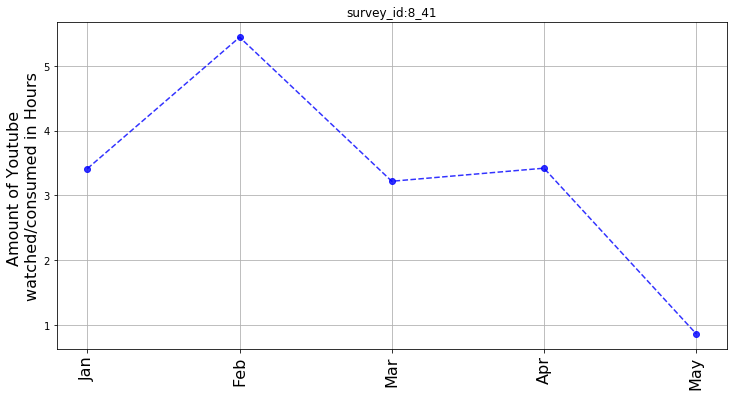

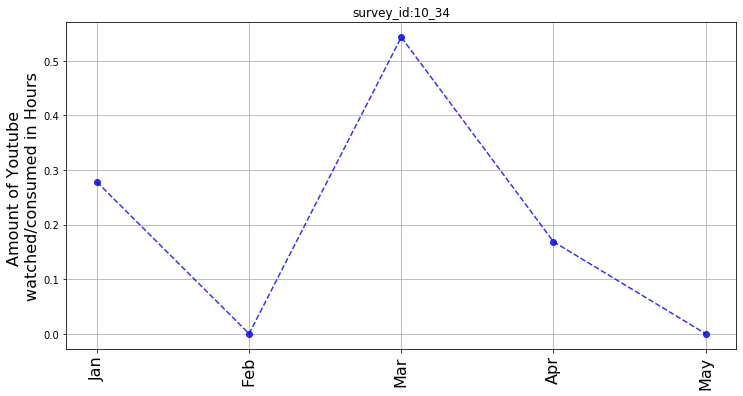

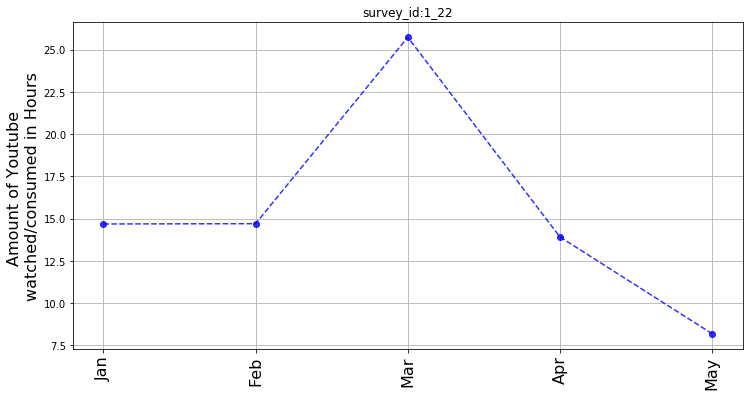

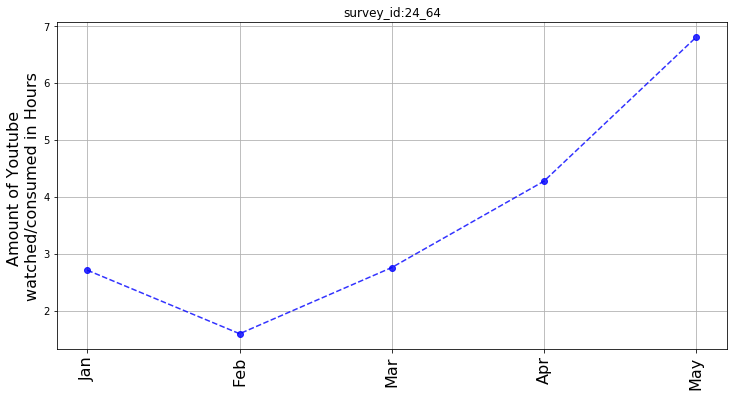

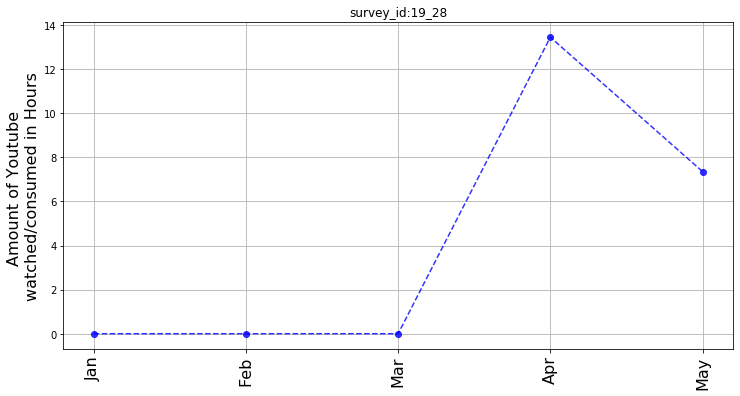

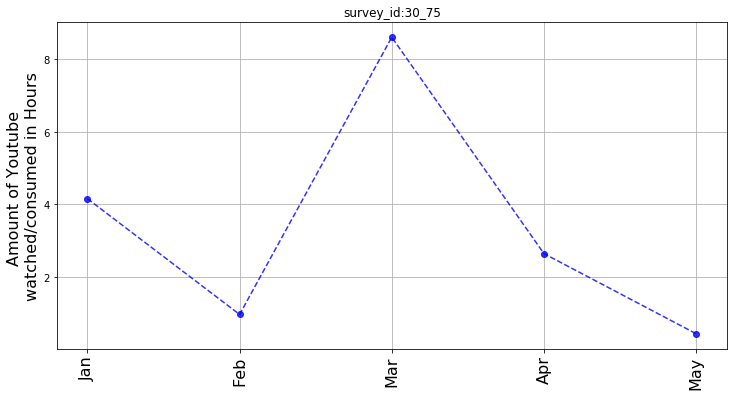

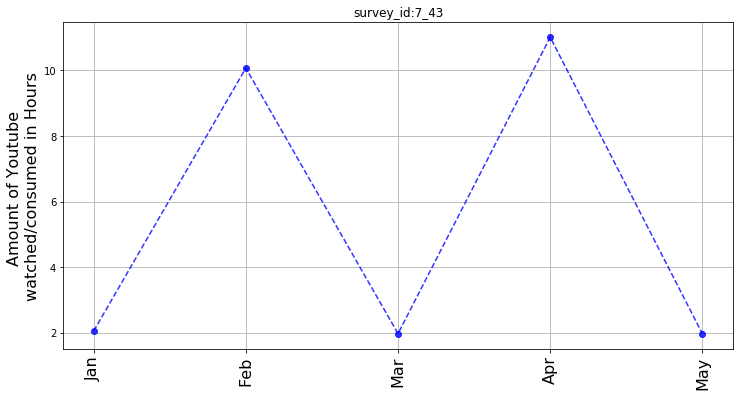

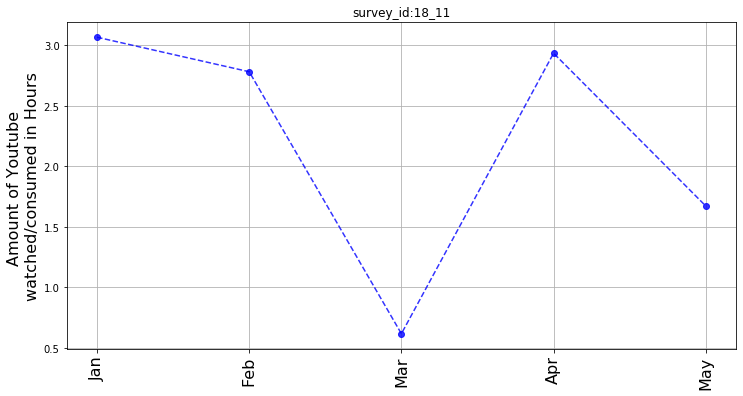

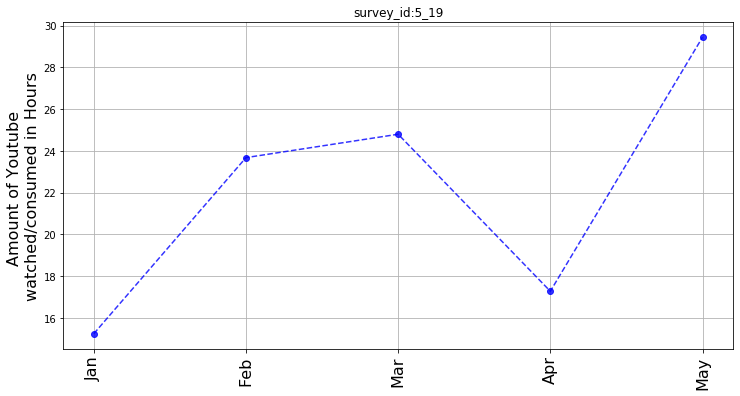

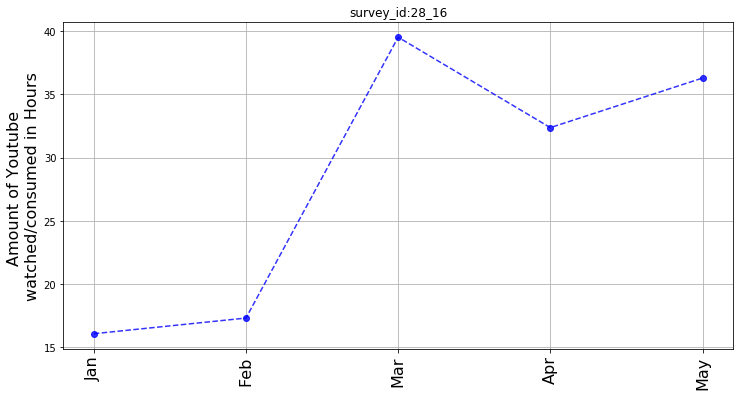

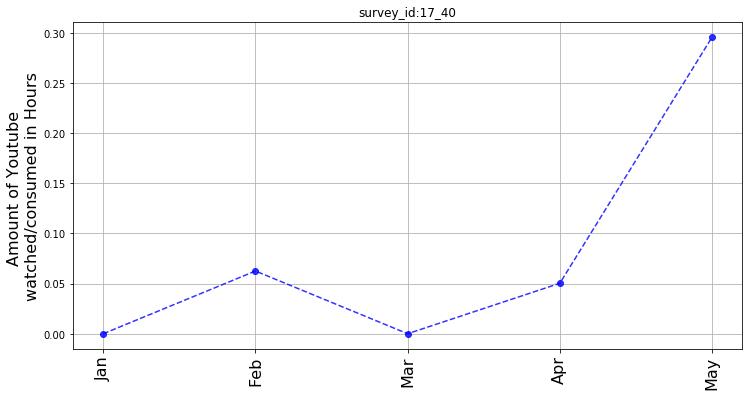

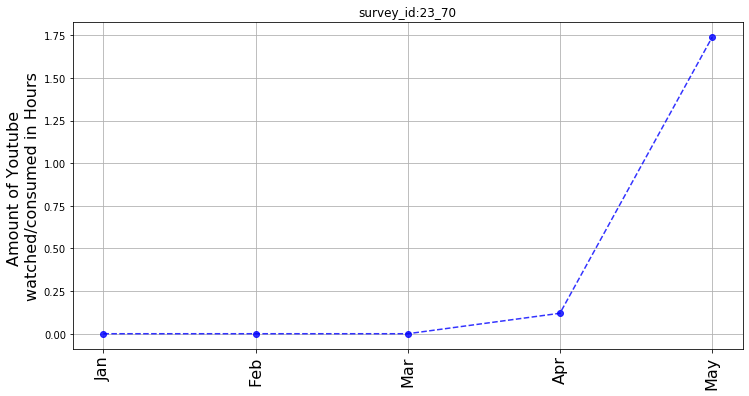

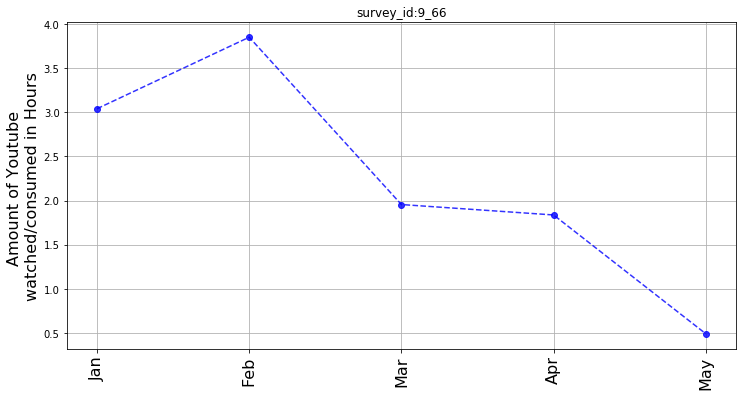

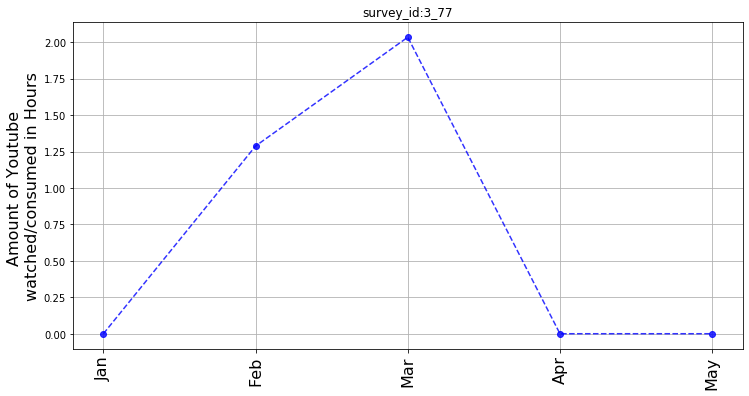

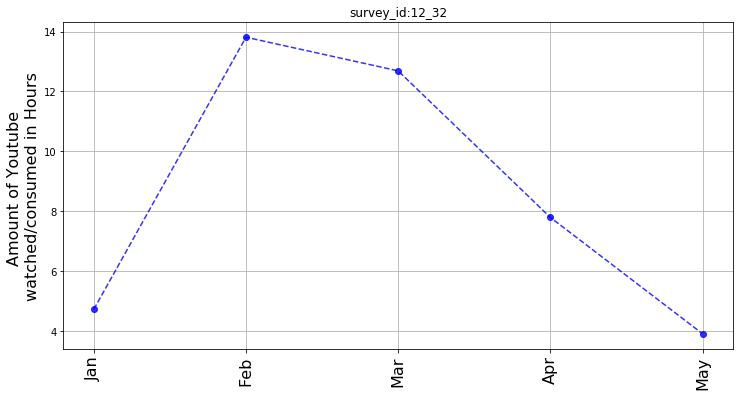

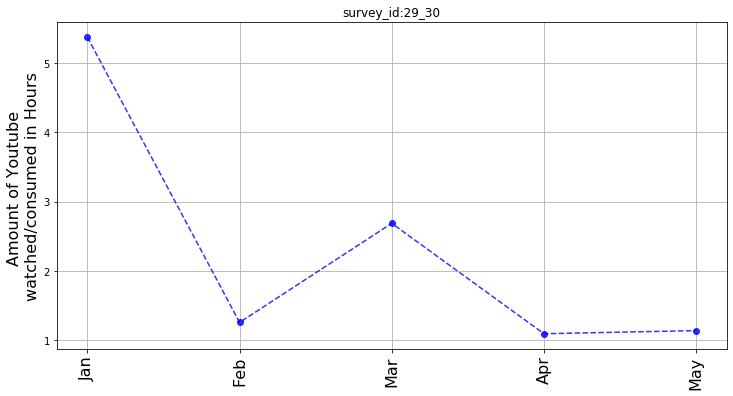

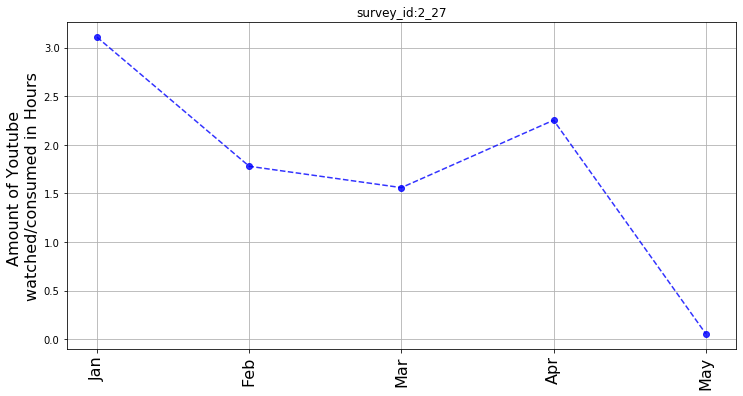

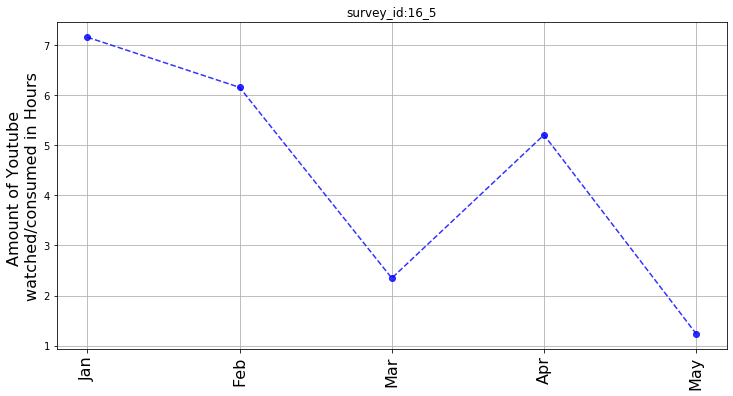

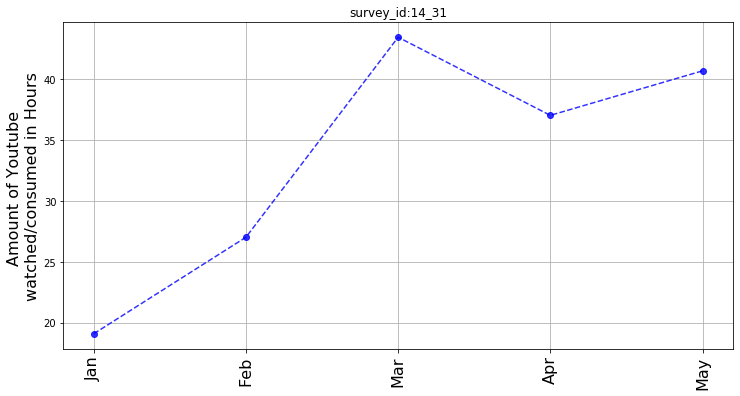

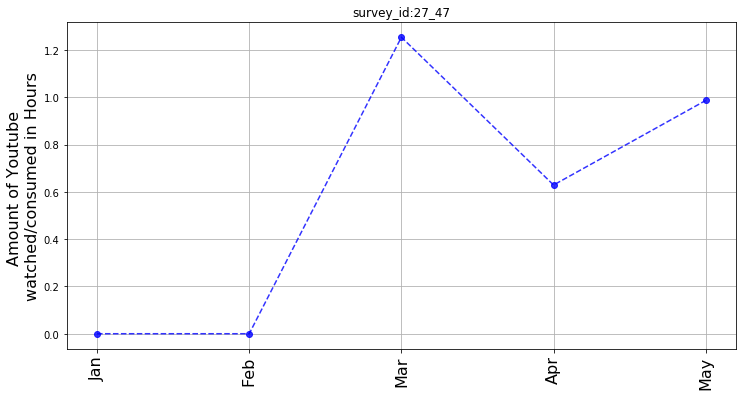

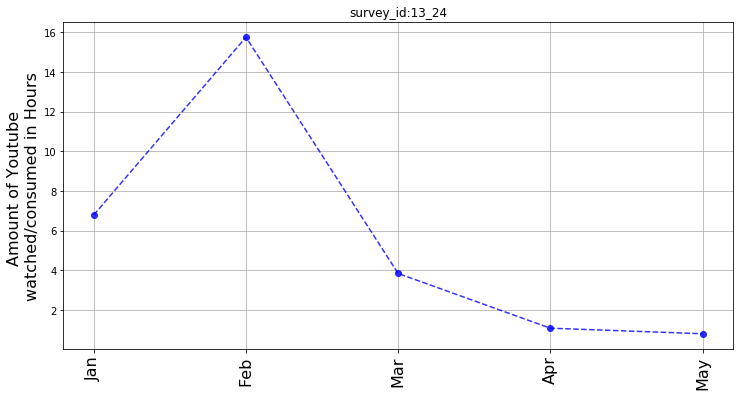

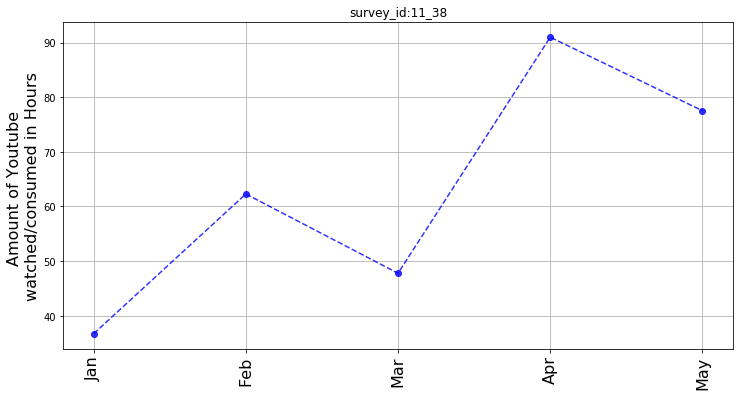

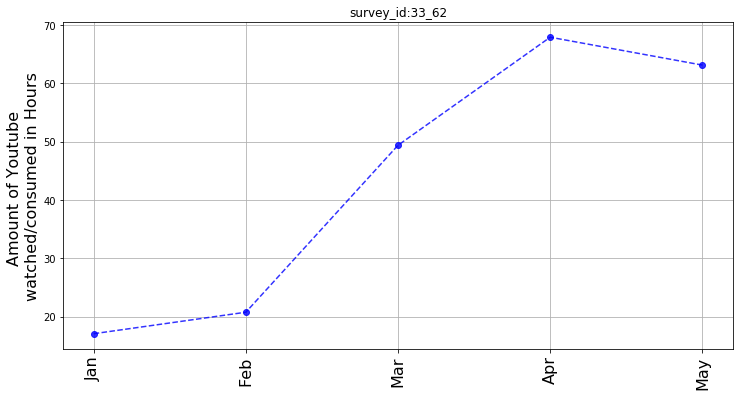

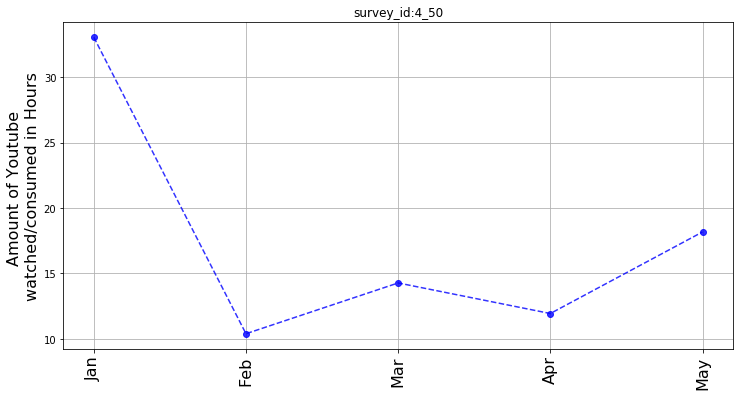

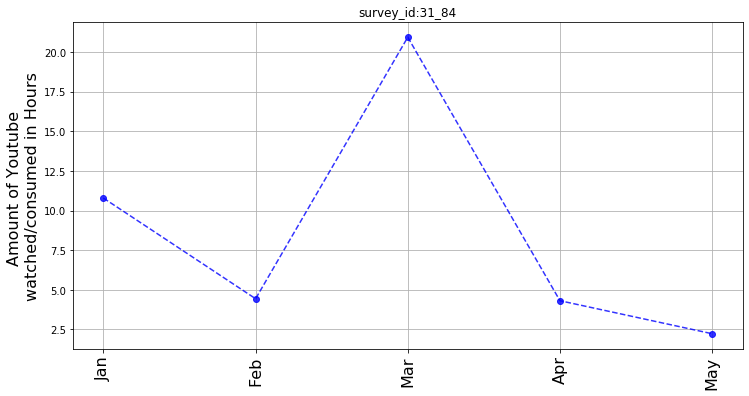

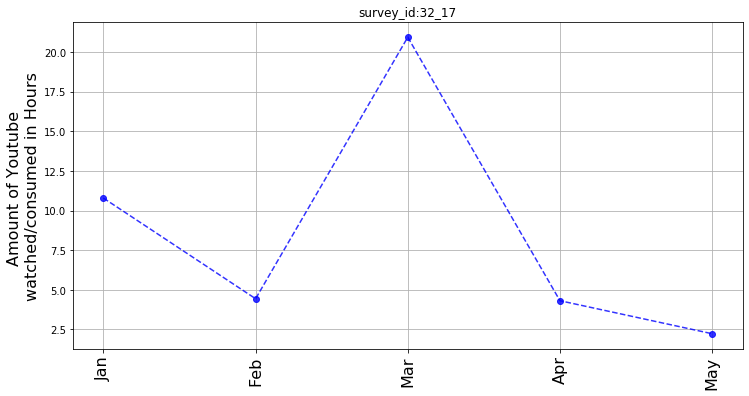

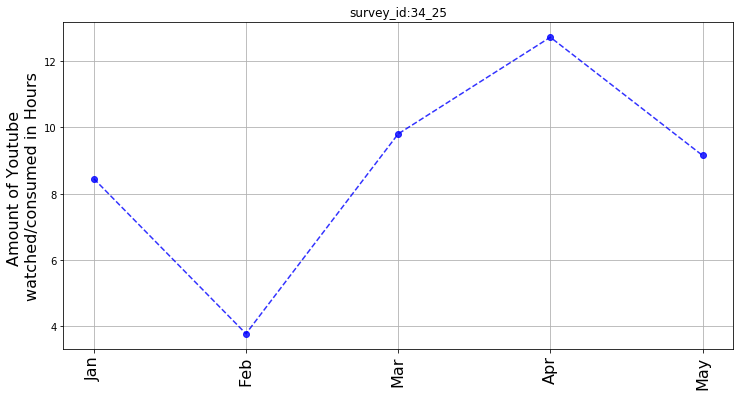

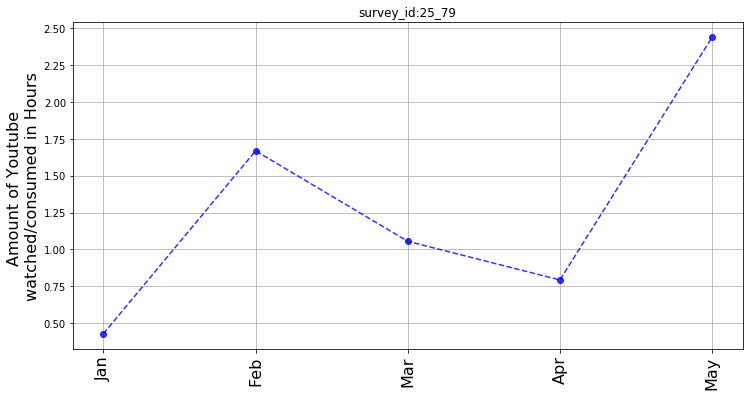

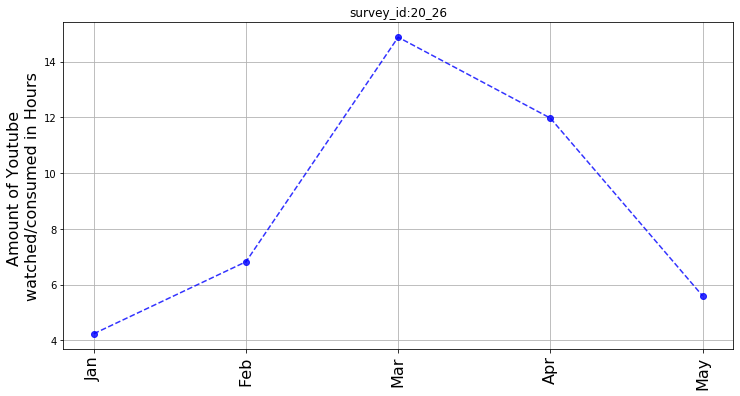

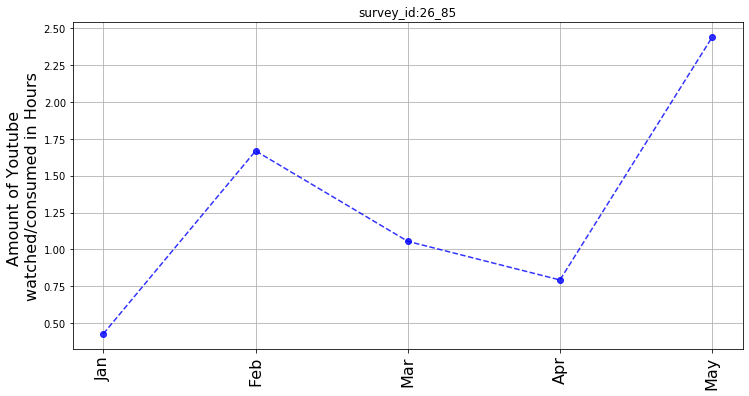

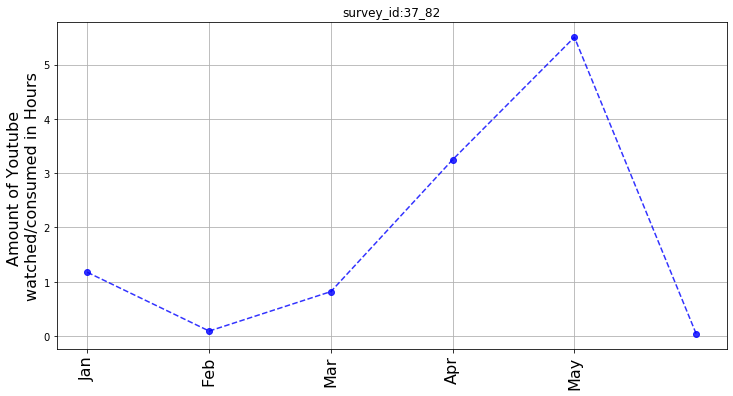

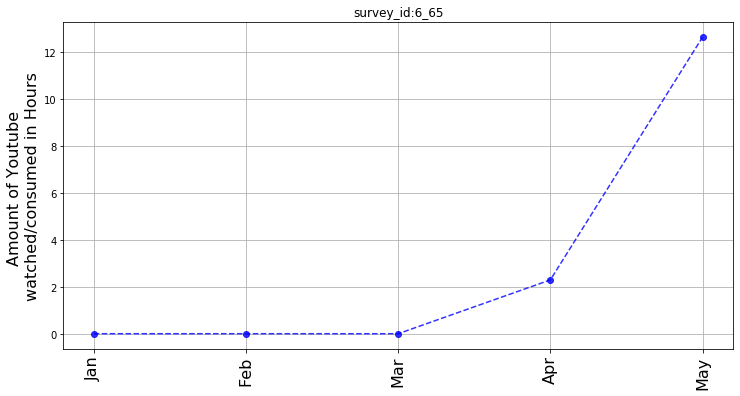

In [58]:

for f in files:
    
#     df = pd.read_csv(f)
#     df['datetime']= pd.to_datetime(df['datetime'])
#     df_jan = df_jan.append(df[(df.years == 2020) & (df.months == 1)], ignore_index=True)
#     df_feb = df_feb.append(df[(df.years == 2020) & (df.months == 2)], ignore_index=True)
#     df_march = df_march.append(df[(df.years == 2020) & (df.months == 3)], ignore_index=True)
#     df_april = df_april.append(df[(df.years == 2020) & (df.months == 4)], ignore_index=True)
#     df_may = df_may.append(df[(df.years == 2020) & (df.months == 5)], ignore_index=True)
#     df_june = df_june.append(df[(df.years == 2020) & (df.months == 6)], ignore_index=True)
#     df_2020 = df_june.append(df[(df.years == 2020) & (df.months < 6)], ignore_index=True)
#     df_2020_weekend_events = df_2020.append(df[df.weekdays >= 5], ignore_index=True)
#     df_2020_weekday_events = df_2020.append(df[df.weekdays < 5], ignore_index=True)
    id_ = f.split('/')[-1].split('.')[0]
    df = pd.read_csv(f)
    df['datetime']= pd.to_datetime(df['datetime'])
    df_jan = df[(df.years == 2020) & (df.months == 1)]
    df_feb = df[(df.years == 2020) & (df.months == 2)]
    df_march = df[(df.years == 2020) & (df.months == 3)]
    df_april = df[(df.years == 2020) & (df.months == 4)]
    df_may = df[(df.years == 2020) & (df.months == 5)]
    df_june = df[(df.years == 2020) & (df.months == 6)]

    df_2020_weekend_events = df[df.weekdays >= 5]
    df_2020_weekday_events = df[df.weekdays < 5]
    
    weekly_gs = []
    weekly_utube = []
    weekly_total = []
    week_labels = []
    weekly_consumptions = []
    i = 0
    for week, wdf in df.set_index('datetime').groupby(pd.Grouper(freq='M')):
        if len(wdf) >0:
            week_label = str(week).split(' ')[0]
            week_labels.append(week_label)
            
            
            num_gs = 0
            num_youtube = 0
            #print(week_label, len(wdf))
            total_weekly_durations = wdf[wdf.source == 'youtube'].durations.sum()/3600.0
            week_labels.append(week_label)
            weekly_consumptions.append(total_weekly_durations)
    if weekly_consumptions and np.sum(np.array(weekly_consumptions))!=0.0:
        plt.figure(figsize=(12, 6))
        plt.plot(range(len(weekly_consumptions)), weekly_consumptions, 'o--',label='Youtube consumption',alpha=0.8,color='blue')
        plt.ylabel('Amount of Youtube \nwatched/consumed in Hours',fontsize=16)
        plt.xticks([0,1,2,3,4],['Jan','Feb','Mar','Apr','May'],rotation=90,fontsize=16)
        plt.grid()
        plt.title('survey_id:'+str(id_))
#     plt.plot(range(len(weekly_utube)), weekly_utube, label='YT',alpha=0.4,color='blue')
#     plt.plot(range(len(weekly_total)), weekly_total, label='Total',color='green')
#     plt.legend()
#     plt.xticks(range(len(week_labels)),week_labels,rotation=90)
#     plt.axvline(x=9,linewidth=4, color='r')
#     break
#         print(weekly_consumptions)


In [23]:
df_jan.hours.value_counts().sort_index()

0     38
1     27
2     49
3     69
4     24
5     31
6     29
7     10
8      7
9     38
10    34
11    68
12    90
13    49
14    51
15    30
16    18
17    17
18     9
19    34
20    13
21    36
22    48
23    59
Name: hours, dtype: int64

In [24]:
df_feb.hours.value_counts().sort_index()

0      65
1      21
2      13
8       8
9      38
10     79
11    106
12     80
13     36
14     54
15     47
16     78
17     85
18     72
19     95
20     83
21     66
22     46
23     74
Name: hours, dtype: int64

In [28]:
df_may.hours.value_counts().sort_index()

0      20
1      45
2       5
10     39
11    105
12    136
13     89
14     54
15     51
16     31
17     39
18     23
19     60
20     33
21     17
22     39
23     60
Name: hours, dtype: int64

In [29]:
df_april.hours.value_counts().sort_index()

0      69
1      30
2      21
9      19
10     89
11    161
12     78
13     53
14     41
15     47
16     74
17     23
18     39
19     44
20     61
21     68
22     66
23     60
Name: hours, dtype: int64